# Importing Libraries

In [3]:
#Downloading necessary  libraries

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt
np.random.seed(42)
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
!pip install folium
import folium

# Exploring the data

In [4]:
nyc_air = pd.read_csv("NYC_air_quality.csv") #we have to make it avilable in the data repo and extract it from there
nyc_air.head()

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0  ...      0      0      0      0      0      0      0   
1     0     2  ...      0      0      0      0      0      0      0   
2     0     1  ...      0      0      0      0      0      0      0   
3     0     0  ...      0      0      0      0      0      0      0   
4     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508813  
1         23.7      57.8  5.462420  
2         23.7      57.8  5.154881  
3         23.6      57.6  4.508813  
4         23.6      57.5  5.539503  

[5 rows x 31 columns]

In [5]:
nyc_air.shape #before cleaning the data

(169999, 31)

In [6]:
nyc_air.size

5269969

In [7]:
nyc_air['time'] = pd.to_datetime(nyc_air['time']) #convert the time column to datetime format


In [8]:
# Drop columns by specifying column names
nyc_air.drop(columns=['bin0', 'bin1','bin2', 'bin3','bin4', 'bin5','bin6', 'bin7','bin8', 'bin9','bin10',
                      'bin11', 'bin12','bin13', 'bin14','bin15', 'bin16','bin17', 'bin18','bin19', 'bin20',
                      'bin21','bin22', 'bin23'], inplace=True)


In [9]:
nyc_air.isnull().sum() #checking for the total of null data

SensorID       0
time           0
latitude       0
longitude      0
temperature    0
humidity       0
pm25           0
dtype: int64

In [10]:
#nyc_air = nyc_air.dropna()

In [11]:
nyc_air.head()

SensorID                          time   latitude  longitude  \
0  NYCP2_CS01A 1970-01-01 00:00:01.631277304  40.847672 -73.869316   
1  NYCP2_CS01A 1970-01-01 00:00:01.631277308  40.847668 -73.869316   
2  NYCP2_CS01A 1970-01-01 00:00:01.631277313  40.847649 -73.869362   
3  NYCP2_CS01A 1970-01-01 00:00:01.631277318  40.847649 -73.869362   
4  NYCP2_CS01A 1970-01-01 00:00:01.631277323  40.847649 -73.869362   

   temperature  humidity      pm25  
0         23.7      57.3  4.508813  
1         23.7      57.8  5.462420  
2         23.7      57.8  5.154881  
3         23.6      57.6  4.508813  
4         23.6      57.5  5.539503

In [12]:
unique_years = nyc_air['time'].dt.year.nunique()


print("Unique years present in the data:", unique_years)


Unique years present in the data: 1


In [13]:
#nyc_air.dtypes

In [14]:
nyc_air.shape

(169999, 7)

In [15]:
nyc_air.size #checking the size of the data to know how to calculate the average later

1189993

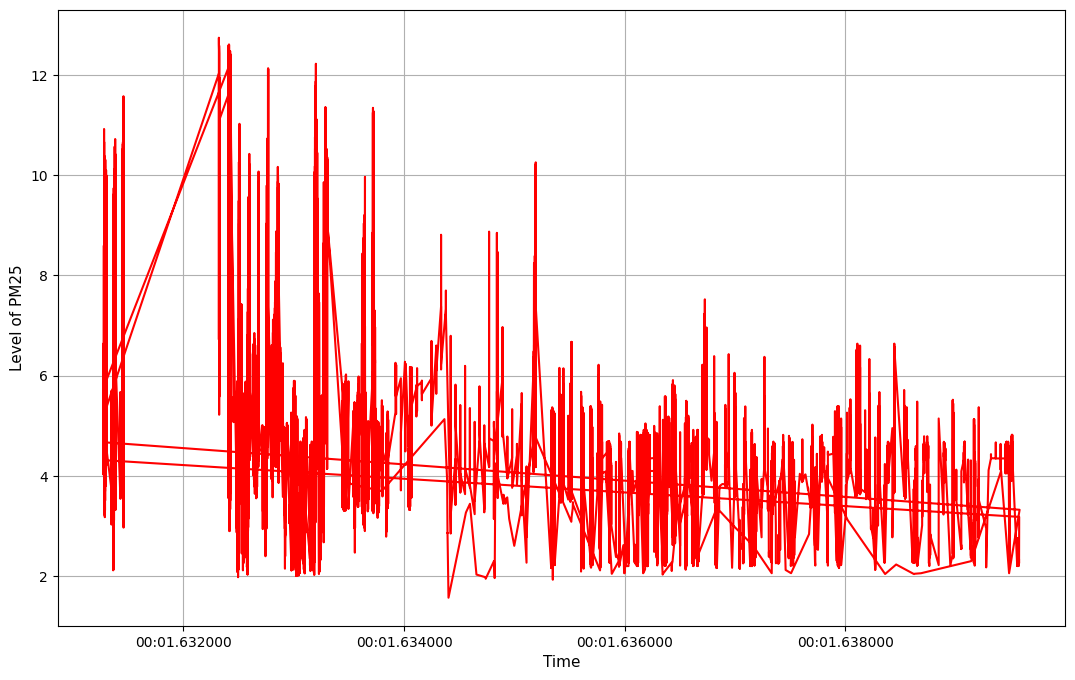

In [16]:
fig, ax = plt.subplots(figsize=(13,8))
plt.plot(nyc_air["time"], nyc_air["pm25"], color='Red')
ax.set_xlabel('Time', fontsize='11')
ax.set_ylabel('Level of PM25', fontsize='11')
plt.grid()
plt.show()

In [17]:
'''
min_value = nyc_air['pm25'].min()
max_value = nyc_air['pm25'].max()


print("Maximum value of pm25:", max_value)
print("Minimum value of pm25:", min_value)
'''

'\nmin_value = nyc_air[\'pm25\'].min()\nmax_value = nyc_air[\'pm25\'].max()\n\n\nprint("Maximum value of pm25:", max_value)\nprint("Minimum value of pm25:", min_value)\n'

In [18]:
'''
mean_value = nyc_air['pm25'].mean()


print("The Mean value of pm25:", mean_value)
'''

'\nmean_value = nyc_air[\'pm25\'].mean()\n\n\nprint("The Mean value of pm25:", mean_value)\n'

In [19]:

'''
std_deviation = nyc_air['pm25'].std()


print("Standard Deviation of pm25:", std_deviation)
'''

'\nstd_deviation = nyc_air[\'pm25\'].std()\n\n\nprint("Standard Deviation of pm25:", std_deviation)\n'

In [20]:
column_pm = nyc_air['pm25'].describe()

print(column_pm)

count    169999.000000
mean          4.310939
std           1.794719
min           1.568473
25%           3.162405
50%           4.251249
75%           4.786389
max          12.744419
Name: pm25, dtype: float64


In [21]:
nyc_air.describe()


time       latitude      longitude  \
count                         169999  169999.000000  169999.000000   
mean   1970-01-01 00:00:01.634506152      40.826202     -73.892555   
min    1970-01-01 00:00:01.631276949      40.711689     -73.934052   
25%    1970-01-01 00:00:01.632808012      40.813564     -73.911232   
50%    1970-01-01 00:00:01.633554218      40.818981     -73.892303   
75%    1970-01-01 00:00:01.636266289      40.845383     -73.870804   
max    1970-01-01 00:00:01.639578955      40.904430     -73.820808   
std                              NaN       0.017215       0.019362   

         temperature       humidity           pm25  
count  169999.000000  169999.000000  169999.000000  
mean       17.432182      56.241018       4.310939  
min       -37.000000       0.000000       1.568473  
25%        12.400000      42.200000       3.162405  
50%        18.400000      55.300000       4.251249  
75%        22.600000      69.000000       4.786389  
max        32.400000     100.000000      12.744419  
std         6.659859      16.583384       1.794719

In [22]:
#nyc_air = nyc_air.dropna()
#nyc_air.size

# Isolation Forest

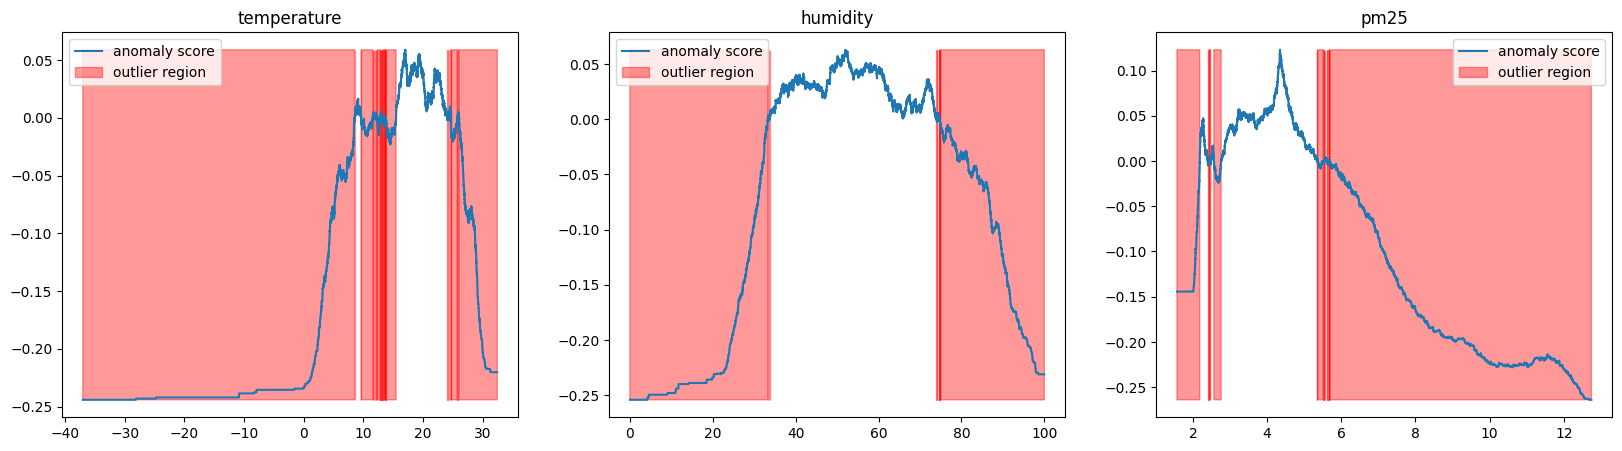

In [72]:
cols = ['temperature','humidity','pm25']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(nyc_air[column].values.reshape(-1,1))

    xx = np.linspace(nyc_air[column].min(), nyc_air[column].max(), len(nyc_air)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                     where=outlier==-1, color='r',
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# LOF

In [73]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = nyc_air[['temperature','pm25']].values
y_pred = clf.fit_predict(X)

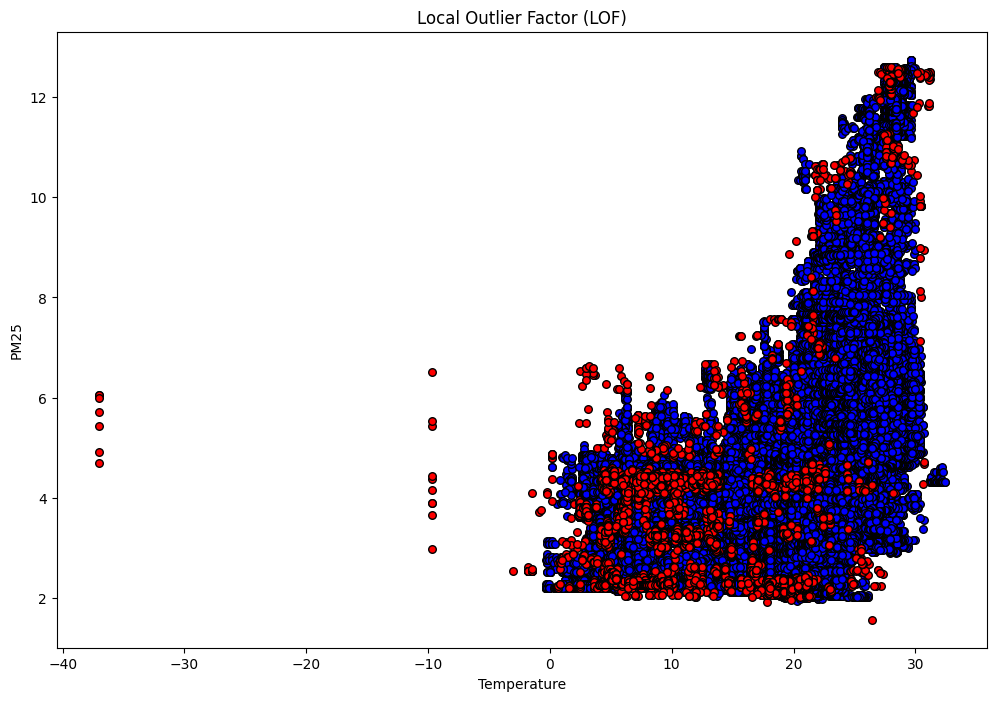

In [74]:
plt.figure(figsize=(12,8))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Temperature');
plt.ylabel('PM25');
plt.show()

# K-Means

In [25]:
# Initialize the Kmeans object
kmeans = KMeans(n_clusters=10, random_state=42)

# Scale the data features we want
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nyc_air[['latitude','longitude', 'pm25']])

In [26]:
# Runing the fit
kmeans.fit(scaled_data)

# Save the cluster labels
nyc_air['label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# New column to show
nyc_air.head()

SensorID                          time   latitude  longitude  \
0  NYCP2_CS01A 1970-01-01 00:00:01.631277304  40.847672 -73.869316   
1  NYCP2_CS01A 1970-01-01 00:00:01.631277308  40.847668 -73.869316   
2  NYCP2_CS01A 1970-01-01 00:00:01.631277313  40.847649 -73.869362   
3  NYCP2_CS01A 1970-01-01 00:00:01.631277318  40.847649 -73.869362   
4  NYCP2_CS01A 1970-01-01 00:00:01.631277323  40.847649 -73.869362   

   temperature  humidity      pm25  label  
0         23.7      57.3  4.508813      1  
1         23.7      57.8  5.462420      1  
2         23.7      57.8  5.154881      1  
3         23.6      57.6  4.508813      1  
4         23.6      57.5  5.539503      1

In [28]:
alt.Chart(nyc_air.head(5000)).mark_circle().encode(
    alt.X('temperature:Q', scale=alt.Scale(type='log')),
    alt.Y('humidity:Q', scale=alt.Scale(zero=False)),
    size='pm25:Q',
    color=alt.Color('label:N', scale=alt.Scale(scheme='dark2')),
    tooltip=list(nyc_air.columns)
).interactive()

alt.Chart(...)

# DBSCAN
Note: this part kept crashing the session for the code

In [23]:
db= nyc_air[['temperature','pm25']]

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
model = dbscan.fit(db)
labels = model.labels_

In [ ]:
#display anomalies in a table
nyc_air["anomaly_score"] = labels
anomalies = nyc_air[nyc_air.anomaly_score == -1]
anomalies

In [ ]:
# Create a scatter plot to view anomalies
plt.figure(figsize=(12, 8))
plt.scatter(nyc_air['temperature'],nyc_air['pm25'], c=model, cmap='viridis', marker='o', s=100, edgecolor='k')

# Highlight anomalies (Noise points are given the label -1)
anomalies = X[model == -1]
plt.scatter(anomalies['temperature'], anomalies['pm25'], c='red', marker='x', label='Anomaly')

plt.xlabel('temperature')
plt.ylabel('pm25')
plt.legend()
plt.show()

# Calculate features per cluster for K-Means

In [79]:
'''
group by the label column
calculate the mean() of each of our features
calculate the number of neighborhoods per cluster
'''
nyc_air.groupby('label', as_index=False).size()

label   size
0      0  22169
1      1  30654
2      2  11792
3      3  28185
4      4   5178
5      5  27751
6      6  22333
7      7   2318
8      8    281
9      9  19338

In [80]:
nyc_air.loc[nyc_air['label'] == 3]

SensorID                          time   latitude  longitude  \
1245    NYCP2_CS01A 1970-01-01 00:00:01.632411129  40.821465 -73.888367   
1261    NYCP2_CS01A 1970-01-01 00:00:01.632411209  40.823601 -73.877563   
1265    NYCP2_CS01A 1970-01-01 00:00:01.632411229  40.823887 -73.874718   
1273    NYCP2_CS01A 1970-01-01 00:00:01.632411269  40.824226 -73.871948   
1470    NYCP2_CS01A 1970-01-01 00:00:01.632412728  40.824398 -73.873688   
...             ...                           ...        ...        ...   
169980  NYCP2_CS03A 1970-01-01 00:00:01.631457039  40.823380 -73.890488   
169982  NYCP2_CS03A 1970-01-01 00:00:01.631457049  40.823380 -73.890488   
169984  NYCP2_CS03A 1970-01-01 00:00:01.631457059  40.823380 -73.890488   
169994  NYCP2_CS03A 1970-01-01 00:00:01.631457109  40.823353 -73.890488   
169995  NYCP2_CS03A 1970-01-01 00:00:01.631457114  40.823349 -73.890480   

        temperature  humidity      pm25  label  
1245           27.5      67.7  3.569636      3  
1261           27.7      67.2  3.668211      3  
1265           27.7      66.6  5.728684      3  
1273           27.9      67.3  3.668211      3  
1470           28.5      63.8  5.456278      3  
...             ...       ...       ...    ...  
169980         24.8      54.2  5.298209      3  
169982         24.7      54.4  5.298209      3  
169984         24.7      54.4  5.633453      3  
169994         24.6      54.8  5.460360      3  
169995         24.6      54.8  5.298209      3  

[28185 rows x 8 columns]

In [81]:
nyc_air.loc[nyc_air['label'] == 8]

SensorID                          time   latitude  longitude  \
249  NYCP2_CS01A 1970-01-01 00:00:01.632320946  40.745548 -73.844963   
250  NYCP2_CS01A 1970-01-01 00:00:01.632320949  40.745548 -73.844963   
251  NYCP2_CS01A 1970-01-01 00:00:01.632320954  40.745548 -73.844963   
252  NYCP2_CS01A 1970-01-01 00:00:01.632320959  40.745548 -73.844963   
253  NYCP2_CS01A 1970-01-01 00:00:01.632320964  40.745430 -73.844795   
..           ...                           ...        ...        ...   
525  NYCP2_CS01A 1970-01-01 00:00:01.632325167  40.745461 -73.844795   
526  NYCP2_CS01A 1970-01-01 00:00:01.632325172  40.745464 -73.844795   
527  NYCP2_CS01A 1970-01-01 00:00:01.632325177  40.745468 -73.844788   
528  NYCP2_CS01A 1970-01-01 00:00:01.632325182  40.745472 -73.844780   
529  NYCP2_CS01A 1970-01-01 00:00:01.632325187  40.745476 -73.844780   

     temperature  humidity       pm25  label  
249         29.6      60.2  12.031301      8  
250         29.6      60.2   6.728364      8  
251         29.6      60.4  12.059568      8  
252         29.6      60.2  12.682212      8  
253         29.6      60.3  12.593311      8  
..           ...       ...        ...    ...  
525         28.4      71.3  11.051157      8  
526         28.4      69.8   7.883850      8  
527         28.4      69.8  11.104581      8  
528         28.4      69.8  10.525255      8  
529         28.4      69.4  11.104581      8  

[281 rows x 8 columns]

In [82]:
nyc_air.loc[nyc_air['label'] == 1]

SensorID                          time   latitude  longitude  \
0       NYCP2_CS01A 1970-01-01 00:00:01.631277304  40.847672 -73.869316   
1       NYCP2_CS01A 1970-01-01 00:00:01.631277308  40.847668 -73.869316   
2       NYCP2_CS01A 1970-01-01 00:00:01.631277313  40.847649 -73.869362   
3       NYCP2_CS01A 1970-01-01 00:00:01.631277318  40.847649 -73.869362   
4       NYCP2_CS01A 1970-01-01 00:00:01.631277323  40.847649 -73.869362   
...             ...                           ...        ...        ...   
168553  NYCP2_CS03A 1970-01-01 00:00:01.631446468  40.839825 -73.872833   
168554  NYCP2_CS03A 1970-01-01 00:00:01.631446473  40.838768 -73.873093   
168555  NYCP2_CS03A 1970-01-01 00:00:01.631446478  40.837700 -73.873398   
168558  NYCP2_CS03A 1970-01-01 00:00:01.631446493  40.834248 -73.874054   
168566  NYCP2_CS03A 1970-01-01 00:00:01.631446533  40.826096 -73.873070   

        temperature  humidity      pm25  label  
0              23.7      57.3  4.508813      1  
1              23.7      57.8  5.462420      1  
2              23.7      57.8  5.154881      1  
3              23.6      57.6  4.508813      1  
4              23.6      57.5  5.539503      1  
...             ...       ...       ...    ...  
168553         20.2      72.3  7.429057      1  
168554         20.3      72.5  7.970175      1  
168555         20.3      72.3  7.852726      1  
168558         20.5      72.0  6.821429      1  
168566         20.7      71.1  5.511020      1  

[30654 rows x 8 columns]

In [ ]:
https://www.kaggle.com/code/amitkishore/dbscan-kmeans-for-outlier-detection


# Geometry and Coordinates

Extracting the first five pairs of latitude and longitude coordinates from the nyc_air_quality DataFrame

In [ ]:
'''
for lat, lon in zip(nyc_air['latitude'][:5], nyc_air['longitude'][:5]):
    geometry = lat, lon
    print(geometry)
'''

(40.847672, -73.869316)
(40.847668, -73.869316)
(40.847649, -73.869362)
(40.847649, -73.869362)
(40.847649, -73.869362)


# KNN Method

In [87]:
x = nyc_air[['temperature', 'humidity','pm25']]

In [88]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(x)

NearestNeighbors(n_neighbors=3)

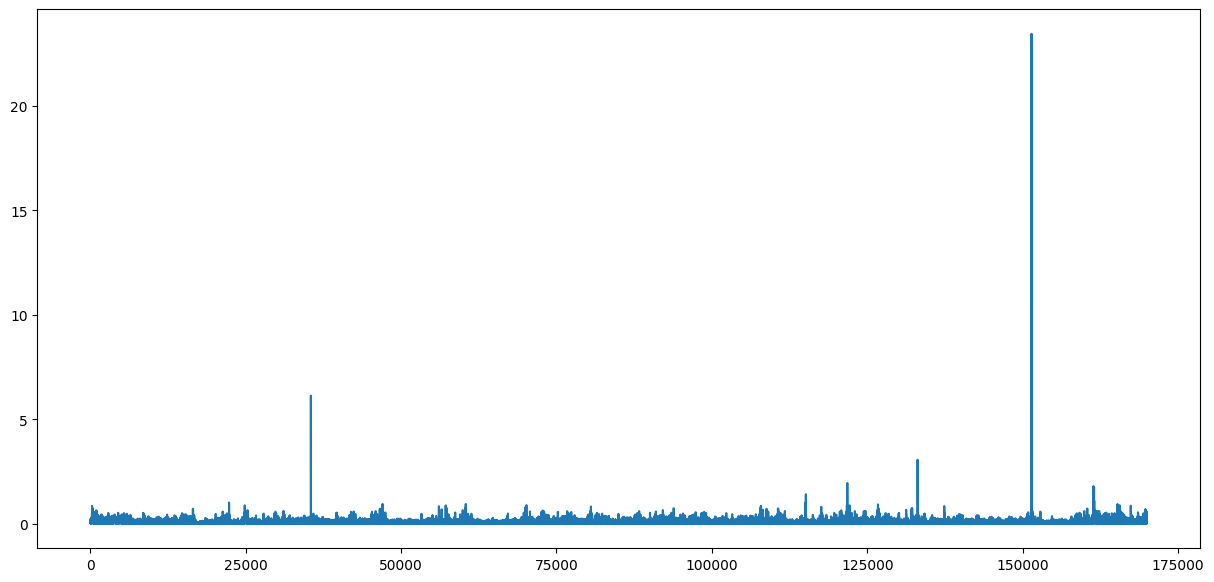

In [89]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(x)
# plot mean of k-distances of each observation
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))


In [90]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0         0.124382
1         0.145079
2         0.097110
3         0.159614
4         0.054458
            ...   
169994    0.122218
169995    0.087820
169996    0.066667
169997    0.034015
169998    0.068030
Length: 169999, dtype: float64

In [91]:
distances_mean.describe()

count    169999.000000
mean          0.061759
std           0.086829
min           0.000000
25%           0.012358
50%           0.053935
75%           0.083172
max          23.459812
dtype: float64

In [92]:
th = 0.09 #based on the 75th percentile we have put 0.09 as the threshold
outlier_index = np.where(distances_mean > th)
outlier_index

(array([     0,      1,      2, ..., 169992, 169993, 169994]),)

In [93]:
outlier_values = nyc_air.iloc[outlier_index]
outlier_values

SensorID                          time   latitude  longitude  \
0       NYCP2_CS01A 1970-01-01 00:00:01.631277304  40.847672 -73.869316   
1       NYCP2_CS01A 1970-01-01 00:00:01.631277308  40.847668 -73.869316   
2       NYCP2_CS01A 1970-01-01 00:00:01.631277313  40.847649 -73.869362   
3       NYCP2_CS01A 1970-01-01 00:00:01.631277318  40.847649 -73.869362   
5       NYCP2_CS01A 1970-01-01 00:00:01.631277328  40.847649 -73.869362   
...             ...                           ...        ...        ...   
169987  NYCP2_CS03A 1970-01-01 00:00:01.631457074  40.823376 -73.890488   
169989  NYCP2_CS03A 1970-01-01 00:00:01.631457084  40.823368 -73.890488   
169992  NYCP2_CS03A 1970-01-01 00:00:01.631457099  40.823357 -73.890488   
169993  NYCP2_CS03A 1970-01-01 00:00:01.631457104  40.823353 -73.890488   
169994  NYCP2_CS03A 1970-01-01 00:00:01.631457109  40.823353 -73.890488   

        temperature  humidity      pm25  label  
0              23.7      57.3  4.508813      1  
1              23.7      57.8  5.462420      1  
2              23.7      57.8  5.154881      1  
3              23.6      57.6  4.508813      1  
5              23.6      57.5  5.165201      1  
...             ...       ...       ...    ...  
169987         24.6      54.7  3.466751      9  
169989         24.7      54.6  9.684003      4  
169992         24.6      54.7  7.860174      2  
169993         24.6      54.7  3.117859      9  
169994         24.6      54.8  5.460360      3  

[37599 rows x 8 columns]

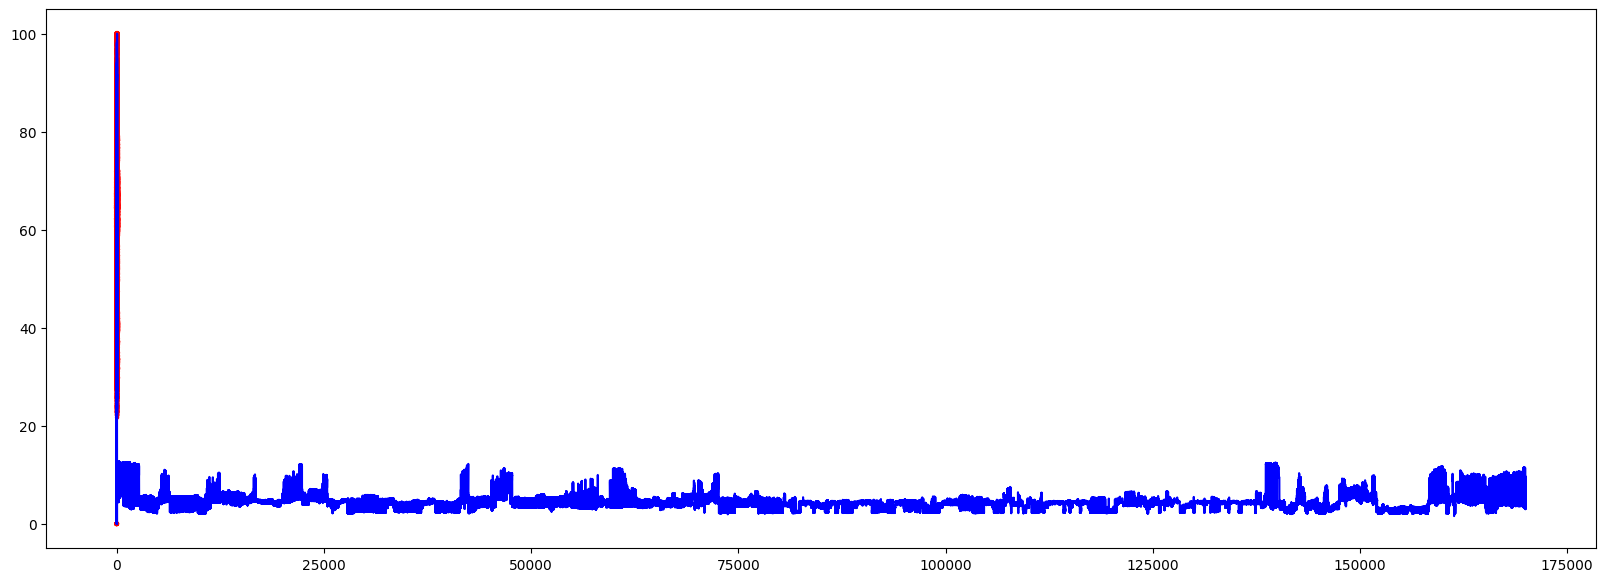

In [94]:
# plot data
plt.figure(figsize=(20, 7))
plt.plot(nyc_air["temperature"], nyc_air["humidity"], nyc_air["pm25"] ,color = "b")
# plot outlier values
plt.scatter(outlier_values["temperature"], outlier_values["humidity"],outlier_values["pm25"], color = "r")

#showing the abnormal points

# Reading GeoDataFrame

In [95]:
nyc = gpd.read_file("nyc_polygon (1).geojson")
nyc.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...  
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...  
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...  
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...

In [ ]:
#nyc.dtypes

neighborhood      object
boroughCode       object
borough           object
@id               object
geometry        geometry
dtype: object

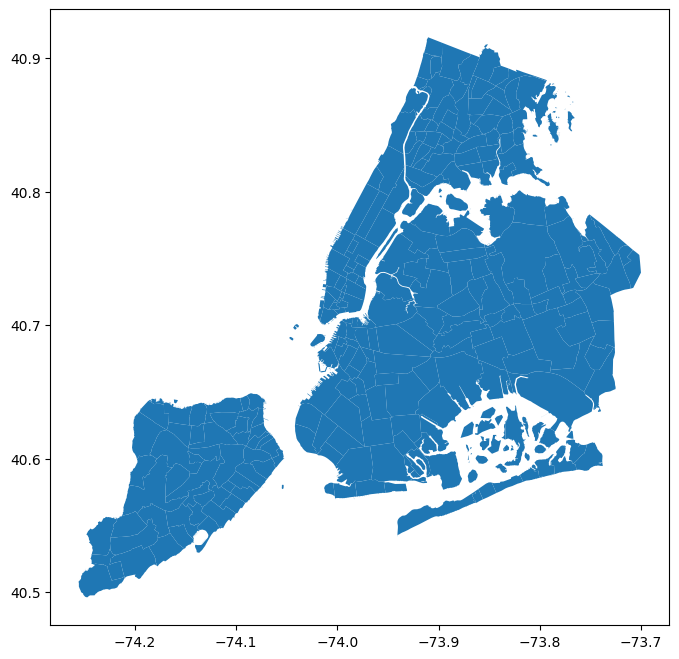

In [96]:
fig, ax = plt.subplots(figsize=(13,8))
nyc.plot(markersize=0.1,ax=ax);
#ax.set_xticklabels([])
#ax.set_yticklabels([])
plt.show()

In [97]:
# do the merge
nyc_air2 = nyc.merge(nyc_air, left_on='neighborhood', right_on='SensorID', how='left')

# assign -1 to the neighborhoods without any listings
nyc_air2['label'] = nyc_air2['label'].fillna(-1)

In [98]:
nyc_air2.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry SensorID time  latitude  \
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...      NaN  NaT       NaN   
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...      NaN  NaT       NaN   
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...      NaN  NaT       NaN   
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...      NaN  NaT       NaN   
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...      NaN  NaT       NaN   

   longitude  temperature  humidity  pm25  label  
0        NaN          NaN       NaN   NaN   -1.0  
1        NaN          NaN       NaN   NaN   -1.0  
2        NaN          NaN       NaN   NaN   -1.0  
3        NaN          NaN       NaN   NaN   -1.0  
4        NaN          NaN       NaN   NaN   -1.0

# Spatial join

In [ ]:
#nyc.plot(column='boroughCode', figsize=(13,8));

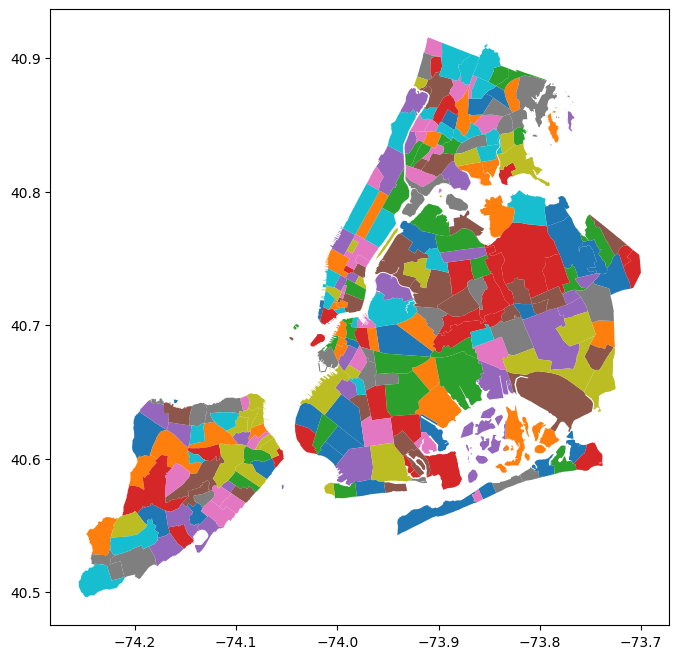

In [ ]:
#nyc.plot(column='neighborhood', figsize=(13,8));

In [ ]:
#Shows the neighborhoods in NewYork
alt.Chart(nyc.to_crs(epsg=4326)).mark_geoshape().properties(
    width=800, height=600,
).encode(
    tooltip=["neighborhood:N"],
    color=alt.Color("neighborhood:N", scale=alt.Scale(scheme="Dark2")),
)

alt.Chart(...)

In [ ]:
nyc.crs # this will determine the CRS in which the geographic data is stored

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

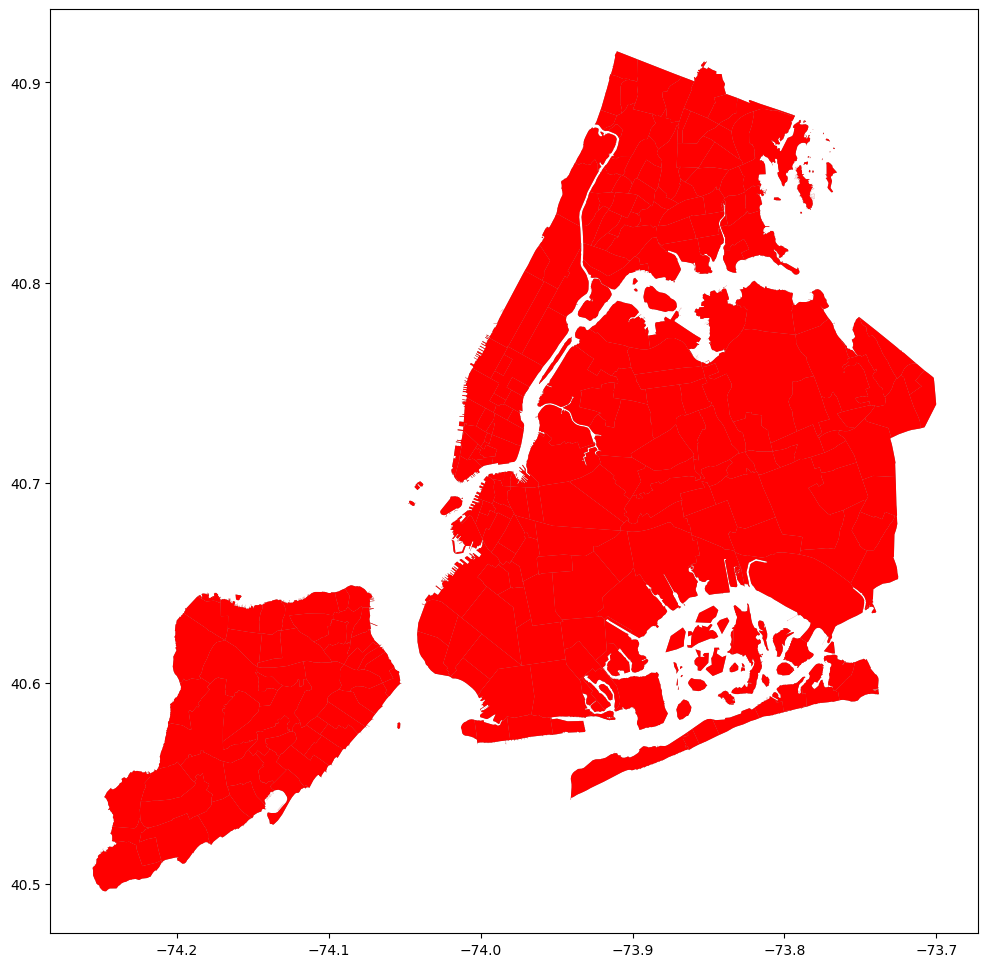

In [ ]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax=ax, color='gray');
nyc_air2.plot(ax=ax, markersize=5, color='red');

In [ ]:
nyc_air_gdf = gpd.GeoDataFrame(nyc_air, geometry=gpd.points_from_xy(nyc_air['longitude'], nyc_air['latitude']))

In [ ]:
nyc_points = gpd.sjoin(nyc_air_gdf, nyc, op='within')
nyc_points.head(2)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-48-93a55939795b>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  nyc_points = gpd.sjoin(nyc_air_gdf, nyc, op='within')


SensorID                          time   latitude  longitude  \
0  NYCP2_CS01A 1970-01-01 00:00:01.631277304  40.847672 -73.869316   
1  NYCP2_CS01A 1970-01-01 00:00:01.631277308  40.847668 -73.869316   

   temperature  humidity      pm25  label                    geometry  \
0         23.7      57.3  4.508813      1  POINT (-73.86932 40.84767)   
1         23.7      57.8  5.462420      1  POINT (-73.86932 40.84767)   

   index_right neighborhood boroughCode borough  \
0           38   Bronx Park           2   Bronx   
1           38   Bronx Park           2   Bronx   

                                                 @id  
0  http://nyc.pediacities.com/Resource/Neighborho...  
1  http://nyc.pediacities.com/Resource/Neighborho...

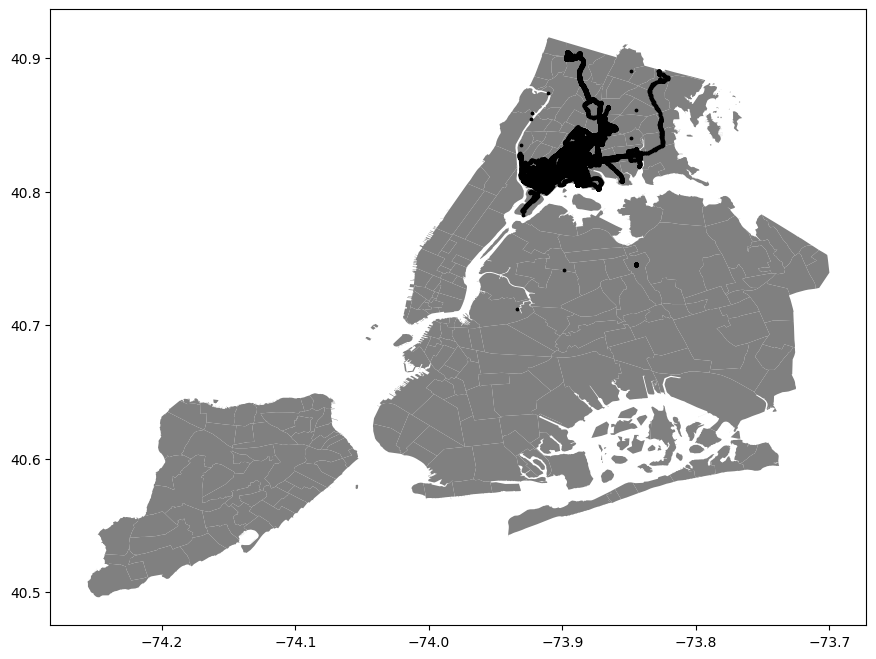

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
nyc.plot(ax=ax, color='gray');
nyc_points.plot(ax=ax, markersize=3, color='black');

# DBSCANS

# Geo-Vizualization

In [ ]:
m = folium.Map (
    location = [40.847672, -73.869316],
    #tiles='Mapbox Bright',
    zoom_start = 11
)

m

In [ ]:
folium.GeoJson(nyc_air2.sample(100)).add_to(m) #createing a GeoJson layer using the sample of 100 in nyc_air2
m

In [ ]:
from folium.plugins import FastMarkerCluster
nyc_points_sample = nyc_air2.sample(50)
lons = nyc_points_sample['longtitude']
lats = nyc_points_sample['latitude']
m = folium.Map(
    location = [np.mean(nyc_points_sample.latitude), np.mean(nyc_points_sample.longtitude)],
    tiles= 'Stamen Toner',
    zoom_start=13
    )
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
folium.LayerControl().add_to(m)

m


NameError: name 'nyc_air2' is not defined